<a href="https://colab.research.google.com/github/NishatVasker/CSE488_Big-Data-Analytics-/blob/main/cse488_lab8_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import random

In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
# Normalize data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [ ]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

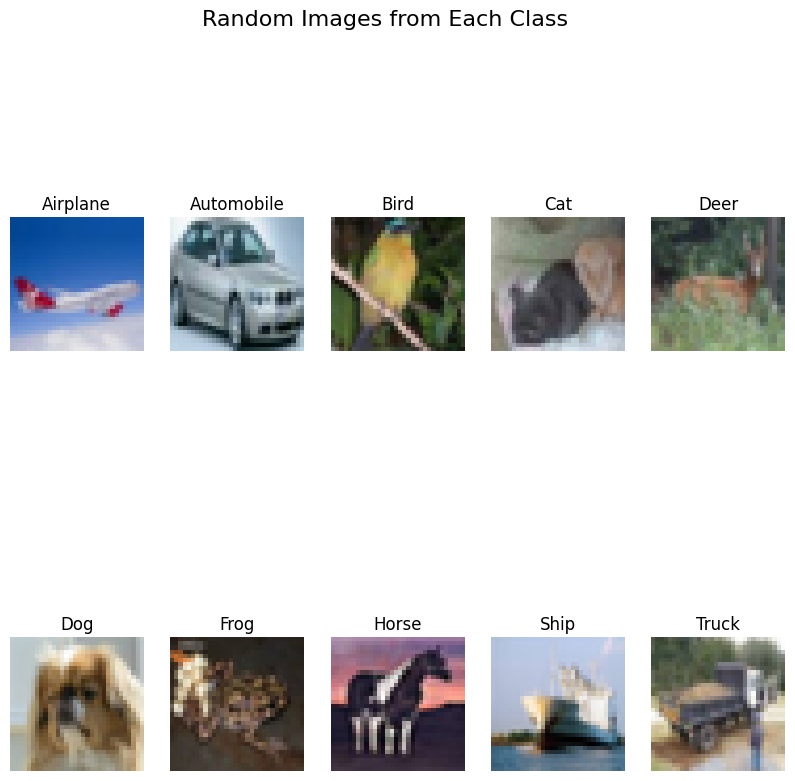

In [ ]:
# Show random images from all classes
plt.figure(figsize=(10, 10))
for i in range(10):
    idx = random.choice(np.where(y_train.flatten() == i)[0])
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[idx])
    plt.title(class_names[i])
    plt.axis('off')
plt.suptitle('Random Images from Each Class', fontsize=16)
plt.show()

## Task 1

In [ ]:
# Modified CNN model
modified_cnn_model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),

    # Block 1
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    # Block 2
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    # Block 3
    layers.Conv2D(128, (5, 5), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),

    # Global Average Pooling
    layers.GlobalAveragePooling2D(),

    # Fully Connected Layers
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the modified model
modified_cnn_model.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

# Train the modified model
modified_cnn_history = modified_cnn_model.fit(x_train, y_train_cat,
                                              epochs=15,
                                              batch_size=64,
                                              validation_split=0.2)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.3033 - loss: 2.1476 - val_accuracy: 0.4812 - val_loss: 1.4438
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5478 - loss: 1.2622 - val_accuracy: 0.6561 - val_loss: 0.9385
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6504 - loss: 1.0008 - val_accuracy: 0.6623 - val_loss: 0.9476
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6999 - loss: 0.8575 - val_accuracy: 0.6867 - val_loss: 0.9217
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7398 - loss: 0.7607 - val_accuracy: 0.7568 - val_loss: 0.7211
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7573 - loss: 0.7086 - val_accuracy: 0.7740 - val_loss: 0.6555
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7774 - loss: 0.6531 - val_accuracy: 0.7754 - val_loss: 0.6527
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7887 - loss: 0.6173 - val_accuracy: 

In [ ]:
test_loss, test_accuracy = modified_cnn_model.evaluate(x_test, y_test_cat)
print("Modified CNN Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8375 - loss: 0.4928
Modified CNN Test Accuracy: 0.8374999761581421


## Task2

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
# Load FASHION-MNIST dataset
(x_train_fmnist, y_train_fmnist), (x_test_fmnist, y_test_fmnist) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Reshape and normalize the images
x_train_fmnist = x_train_fmnist.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test_fmnist = x_test_fmnist.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [ ]:
# One-hot encode the labels
y_train_fmnist_cat = to_categorical(y_train_fmnist, 10)
y_test_fmnist_cat = to_categorical(y_test_fmnist, 10)

In [ ]:
# CNN model (same as Task 1 with padding on the first convolution layer)
cnn_model_fmnist = models.Sequential([
    layers.Input(shape=(28, 28, 1)),

    # Convolution Block 1 with padding
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Convolution Block 2
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Convolution Block 3
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


In [ ]:
# Compile the model
cnn_model_fmnist.compile(optimizer='adam',
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

# Train the CNN model on the FASHION-MNIST dataset
cnn_history_fmnist = cnn_model_fmnist.fit(x_train_fmnist, y_train_fmnist_cat,
                                          epochs=15,
                                          batch_size=64,
                                          validation_split=0.2)

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7481 - loss: 0.7467 - val_accuracy: 0.8842 - val_loss: 0.3159
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8769 - loss: 0.3438 - val_accuracy: 0.8967 - val_loss: 0.2798
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8934 - loss: 0.2939 - val_accuracy: 0.9001 - val_loss: 0.2653
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9060 - loss: 0.2647 - val_accuracy: 0.8813 - val_loss: 0.3220
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9158 - loss: 0.2337 - val_accuracy: 0.9130 - val_loss: 0.2497
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9223 - loss: 0.2132 - val_accuracy: 0.9072 - val_loss: 0.2597
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9265 - loss: 0.1993 - val_accuracy: 0.9208 - val_loss: 0.2308
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9327 - loss: 0.1799 - val_accuracy: 0.

In [ ]:
# Evaluate the model on the test set
test_loss_fmnist, test_accuracy_fmnist = cnn_model_fmnist.evaluate(x_test_fmnist, y_test_fmnist_cat)

print("Test Accuracy on FASHION-MNIST:", test_accuracy_fmnist)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9103 - loss: 0.3397
Test Accuracy on FASHION-MNIST: 0.9124000072479248


In [ ]:
# Define the custom CNN model
cnn_model_improved = models.Sequential([
    layers.Input(shape=(28, 28, 1)),

    # Convolution Block 1
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Convolution Block 2
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Convolution Block 3
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.6),
    layers.Dense(10, activation='softmax')
])

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [ ]:
# Compile the model
cnn_model_improved.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])


# Learning rate scheduler to decrease the learning rate when the validation loss plateaus
lr_scheduler = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=3, verbose=1)

# Train the model on the entire training set (no validation split)
cnn_history_improved = cnn_model_improved.fit(
    x_train_fmnist, y_train_fmnist_cat,
    epochs=15,
    batch_size=64,
    callbacks=[lr_scheduler]
)

Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7510 - loss: 0.7693 - learning_rate: 0.0010
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8655 - loss: 0.3713 - learning_rate: 0.0010
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8898 - loss: 0.3059 - learning_rate: 0.0010
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9016 - loss: 0.2658 - learning_rate: 0.0010
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9137 - loss: 0.2377 - learning_rate: 0.0010
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9199 - loss: 0.2235 - learning_rate: 0.0010
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9257 - loss: 0.2057 - learning_rate: 0.0010
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9319 - loss: 0.1877 - learning_rate: 0.0010
Epoch 9/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9374 - loss: 0.1719 - learning_rate: 0.0010
Epoch 10/

In [ ]:
# Evaluate the improved model on the test set
test_loss_improved, test_accuracy_improved = cnn_model_improved.evaluate(x_test_fmnist, y_test_fmnist_cat)

print("Improved Test Accuracy on FASHION-MNIST:", test_accuracy_improved)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9250 - loss: 0.2796
Improved Test Accuracy on FASHION-MNIST: 0.9223999977111816


## Task4

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow import keras

In [ ]:
# Use a pre-trained model (MobileNetV2)
base_model_task4 = keras.applications.MobileNetV2(input_shape=(32, 32, 3), include_top=False, weights='imagenet')

<ipython-input-21-764e98e5a88d>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model_task4 = keras.applications.MobileNetV2(input_shape=(32, 32, 3), include_top=False, weights='imagenet')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
base_model_task4.trainable = False

In [ ]:
# Add custom top layers
model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    base_model_task4,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [ ]:
# Resize and replicate channels efficiently
x_train_resized = tf.image.resize(x_train, [32, 32])
x_test_resized = tf.image.resize(x_test, [32, 32])

In [ ]:
# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the pre-trained model
history_pretrained = model.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.2504 - loss: 2.0682 - val_accuracy: 0.3184 - val_loss: 1.8777
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3150 - loss: 1.8792 - val_accuracy: 0.3287 - val_loss: 1.8467
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3324 - loss: 1.8460 - val_accuracy: 0.3388 - val_loss: 1.8261
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3355 - loss: 1.8262 - val_accuracy: 0.3432 - val_loss: 1.8148
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3437 - loss: 1.8079 - val_accuracy: 0.3480 - val_loss: 1.8064
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3474 - loss: 1.7989 - val_accuracy: 0.3476 - val_loss: 1.8021
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3513 - loss: 1.7810 - val_accuracy: 0.3532 - val_loss: 1.7946
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3543 - loss: 1.7740 - val_accuracy: 

In [ ]:
# Evaluate the pre-trained model
test_loss_pretrained, test_accuracy_pretrained = model.evaluate(x_test, y_test, verbose=0)
print("Improved Test Accuracy on FASHION-MNIST (Pre-trained Model):", test_accuracy_pretrained)

Improved Test Accuracy on FASHION-MNIST (Pre-trained Model): 0.3589000105857849
